In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import networkx as nx
from pyvis.network import Network
import random

In [3]:
import os
from matplotlib import font_manager as fm

font_file = "../fonts/NanumGothic/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
224     202209  일     0       종로구        중구  F   0   EE          198   28.13
225     202209  일     0       종로구        중구  F  10   EE           22    5.98
226     202209  일     0       종로구        중구  F  15   EH           97   15.78
227     202209  일     0       종로구        중구  F  15   EE           48   22.29
228     202209  일     0       종로구        중구  F  15   HE           45    3.96
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
792718  202209  토     0       강동구       송파구  M  70   EW           41   13.91
792719  202209  토     0       강

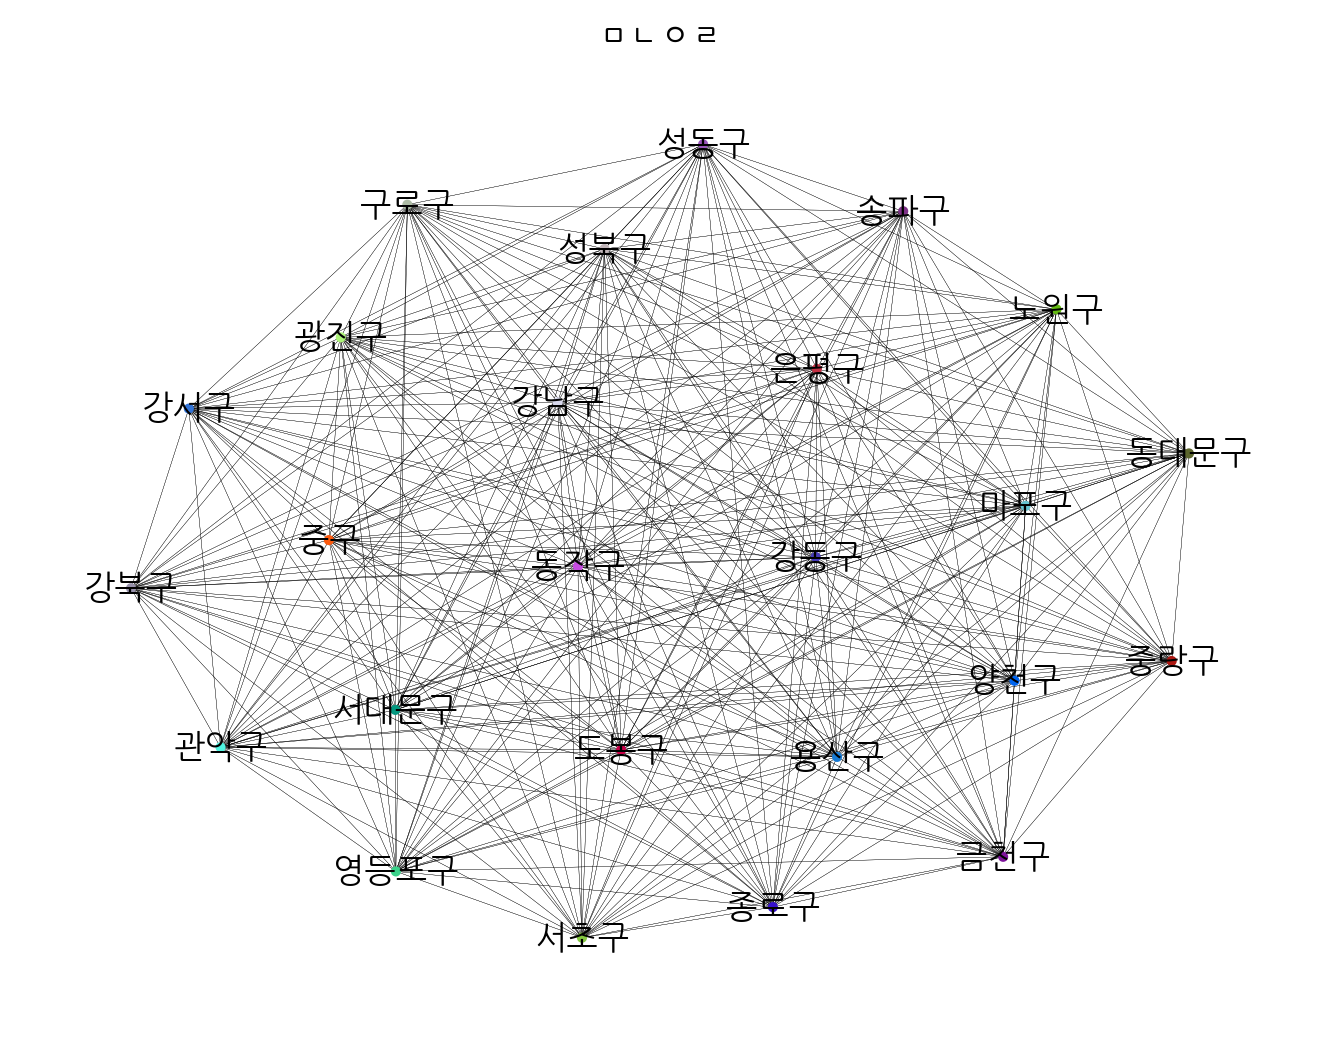

In [8]:
with open("../datasets/한국행정구역분류_행정동코드(서울).csv",
          encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류','읍면동']]
newdata

with open("../large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv",
          encoding='cp949') as f:
    data = pd.read_csv(f)
    # l.append(data)
#data = data.drop_duplicates(subset=['출발 시군구 코드', '도착 시군구 코드'],)
data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

# tst = {key: value for key, value in zip(data1['소분류'], data1['시군구']+" "+data1['읍면동'])} # 이건 자치구용
tst = {key:value for key,value in zip(data1['중분류'], data1['시군구'])}
#tst = {11010:"ㅁㄴㅇㄹ"}
print(tst)

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data)


print(data['이동인구(합)'].size)

graph = nx.from_pandas_edgelist(data,
                                source='출발 시군구 코드',
                                target='도착 시군구 코드',
                                edge_attr='이동인구(합)',
                                create_using=nx.DiGraph())

#for node in graph:

an = data['도착 시군구 코드']
an = an.drop_duplicates()
print(an)
color = [
    "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(an.size)
]
print(color)
# pos = nx.spring_layout(graph)
# nx.draw_networkx_nodes(graph, pos, node_color=color,)
# nx.draw_networkx_edges(graph, pos, width=0.01,)
#nx.draw(graph, with_labels=False, node_color=color,pos=nx.fruchterman_reingold_layout(graph),node_size=7, arrows=False, width=0.001,)
edge_labels = nx.get_edge_attributes(graph, "이동인구(합)")
nx.draw(graph,
        with_labels=True,
        node_color=color,
        node_size=7,
        arrows=False,
        width=0.1,
        font_family='NanumGothic',
        pos=nx.spring_layout(graph))

plt.title("ㅁㄴㅇㄹ")
plt.axis('off')
plt.show()

# 그래프 html 출력
# nt = Network(height='1080px', width='80%',)


# nt.from_nx(graph)
# nt.toggle_physics(False)
# nt.show_buttons(filter_=['physics'])
# nt.show('../results/res1.html')


In [ ]:

with open("../datasets/한국행정구역분류_행정동코드(서울).csv", encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류', '읍면동']]
newdata


from os import listdir

# mport matplotlib.animation as ani

onlyfiles = [f for f in listdir("../large-datasets/생활이동_자치구_202209/")]
# print(sorted(onlyfiles))


def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(
        df1[:i].index,
        df1[:i].values)  #note it only returns the dataset, up to the point i


for filename in sorted(onlyfiles):
    with open("../large-datasets/생활이동_자치구_202209/"+filename, encoding='cp949') as f:
        # print(filename)
        data = pd.read_csv(f)
        # print( data.sort_values(by='평균 이동 시간(분)')[::-1].head(10) )
    # l.append(data)
    #data = data.drop_duplicates(subset=['출발 시군구 코드', '도착 시군구 코드'],)
    data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
    data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

    # tst = {key: value for key, value in zip(data1['소분류'], data1['시군구']+" "+data1['읍면동'])} # 이건 자치구용
    tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}
    # print(tst)

    data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
    data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
    data = data.replace(tst)

    # print(data)

    # print(data['이동인구(합)'].size)

    graph = nx.from_pandas_edgelist(data,
                                source='출발 시군구 코드',
                                target='도착 시군구 코드',
                                edge_attr='이동인구(합)',
                                create_using=nx.DiGraph())
    nx.draw(graph,
            with_labels=True,
            node_color=color,
            node_size=7,
            arrows=False,
            width=0.1,
            font_family='NanumGothic',
            pos=nx.spring_layout(graph))

    plt.title(filename)
    plt.axis('off')
    plt.savefig("../results/forgif/" + filename + ".png", dpi=96)
    plt.close()

# animator = ani.FuncAnimation(fig, buildmebarchart, interval=100)
# plt.show()

# animator.save(r'../results/myfirstAnimation.gif')

#for node in graph:

an = data['도착 시군구 코드']
an = an.drop_duplicates()
print(an)
color = [
    "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(an.size)
]
print(color)
# pos = nx.spring_layout(graph)
# nx.draw_networkx_nodes(graph, pos, node_color=color,)
# nx.draw_networkx_edges(graph, pos, width=0.01,)
#nx.draw(graph, with_labels=False, node_color=color,pos=nx.fruchterman_reingold_layout(graph),node_size=7, arrows=False, width=0.001,)
#edge_labels = nx.get_edge_attributes(graph, "이동인구(합)")


In [ ]:
import imageio.v2 as imageio

print('creating gif\n')
from os import listdir

filenames = ["../results/forgif/" + f for f in listdir("../results/forgif/")]
print(filenames)
frames = [imageio.imread(i) for i in filenames]
# skip_ratio =
# with imageio.get_writer('../results/result.gif', mode='I') as writer:
#     for img_id, filename in enumerate(filenames):
#         image = imageio.imread(filename)
#         if img_id % skip_ratio == 0:
#                 writer.append_data(image)
imageio.mimsave('../results/result.gif', frames, format='GIF', duration=1.5)
print('gif complete\n')